# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Bayesian-Line-Identification-framework-for-WISPS-data" data-toc-modified-id="Bayesian-Line-Identification-framework-for-WISPS-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian Line Identification framework for WISPS data</a></div><div class="lev2 toc-item"><a href="#Retrieve-required-data-from-aXe-products" data-toc-modified-id="Retrieve-required-data-from-aXe-products-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Retrieve required data from aXe products</a></div><div class="lev2 toc-item"><a href="#Load-redshift-estimates" data-toc-modified-id="Load-redshift-estimates-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load redshift estimates</a></div>

# Bayesian Line Identification framework for WISPS data
## Retrieve required data from aXe products
The line identification framework requires:
* A postage stamp cutout from the direct image to be used as a two-dimensional template for the line flux.
* The drizzled, wavelength calibrated, contamination-subtracted stamp for the target.

In [1]:
import os
import astropy.io.fits as astrofits
import astropy.units as astrounits
import astropy.wcs as astrowcs
import astropy.visualization as astrovis
import numpy as np
import scipy as sp
import scipy.stats as spstats

In [2]:
import StampPlotter

Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model
Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model
Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model
Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model
Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model
Border pixels will be trimmed.
Using default MinMaxInterval stretch interval
Using default HistEqStretch stretch model


0.7963426113128662

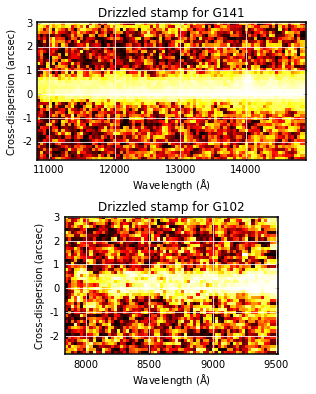

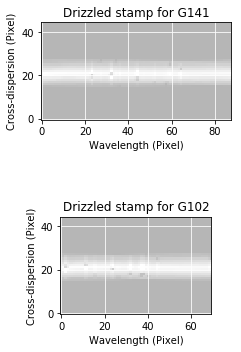

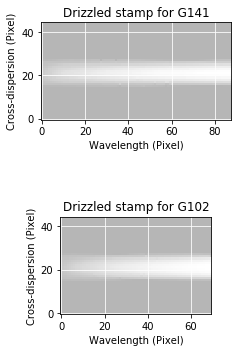

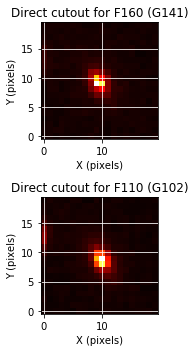

In [13]:
%matplotlib inline 
sl = StampPlotter.StampPlotter()
#sl.stretchInterval = astrovis.PercentileInterval(percentile=50)
sl.loadDrizzledStamps(30, '302_MB')
sl.plotDrizzledStamps(colourMap='hot')
sl.plotDrizzledStamps(extName='WHT', colourMap='gray', applyWCS=False)
sl.plotDrizzledStamps(extName='MOD', colourMap='gray', applyWCS=False)
sl.loadDirectCutouts(30, '302_MB')
sl.plotDirectCutouts(colourMap='hot')
sl.getThresholdedDirectCutout(141)

## Load redshift estimates

In [4]:
estimateFileName = '/Users/hughdickinson/Documents/Development/WISPSBayesianLineID/Par302_estimates.fits'
estimateFile = astrofits.open(estimateFileName)
estimateFile.info()

Filename: /Users/hughdickinson/Documents/Development/WISPSBayesianLineID/Par302_estimates.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1              BinTableHDU     22   668R x 7C   [K, D, D, 28A, D, 331D, L]   


In [5]:
estimateTable = estimateFile[1].data
print(estimateTable.columns)

ColDefs(
    name = 'target'; format = 'K'
    name = 'redshift'; format = 'D'
    name = 'redshift_err'; format = 'D'
    name = 'model'; format = '28A'
    name = 'normalization'; format = 'D'
    name = 'probability'; format = '331D'
    name = 'has_line'; format = 'L'
)
